# 图像直接卷积下的非极大值抑制实现Sobel边缘检测

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy.signal as signal

In [2]:
src = cv2.imread('../datas/f2.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
rgb_f = rgb.astype(np.float32)

In [5]:
def convolution_sobel(src,direction=0):
    srcf = np.float32(src)
    dst = np.zeros_like(srcf)
    sobel_x = np.array([
        [1,0,-1],
        [2,0,-2],
        [1,0,-1]
    ])
    sobel_y = np.array([
        [1,2,1],
        [0,0,0],
        [-1,-2,-1]
    ])
    
    # 卷积计算
#     grad_x = cv2.filter2D(srcf,-1,sobel_x)
#     grad_y = cv2.filter2D(srcf,-1,sobel_y)
    grad_x = signal.convolve2d(srcf,sobel_x,boundary='symm',mode='same')
    grad_y = signal.convolve2d(srcf,sobel_y,boundary='symm',mode='same')
    X,Y = 1,0
    if direction == 0:#X方向
        X = 1
        Y = 0
    elif direction == 1:#Y方向
        X = 0
        Y = 1
    elif direction == 2: #XY方向
        X = 1
        Y = 1
        
    # 计算梯度模长
    dst = np.sqrt(X * grad_x ** 2 + Y * grad_y ** 2)
    return dst,grad_x,grad_y

In [8]:
def nms_convold_sobel(src,scale=4.0,direction=0):
    grad,grad_x,grad_y = convolution_sobel(src,direction=direction)
    thresh = scale * np.mean(grad)
    rows,cols = src.shape[0],src.shape[1]
    dst = np.zeros_like(grad)
    for i in range(1,rows - 1):
        for j in range(1,cols - 1):
            b1 = grad[i,j] > grad[i,j - 1]
            b2 = grad[i,j] > grad[i,j + 1]
            b3 = grad[i,j] > grad[i - 1,j]
            b4 = grad[i,j] > grad[i + 1,j]
            
            # 7.判断邻域梯度是否满足大于水平或垂直条件，并根据自适应域值二值化
            if (grad[i,j] > thresh) and ((b1 and b2) or (b3 and b4)):
                dst[i,j] = 255
    return np.uint8(dst)

In [17]:
dst = nms_convold_sobel(gray,scale=4.0)

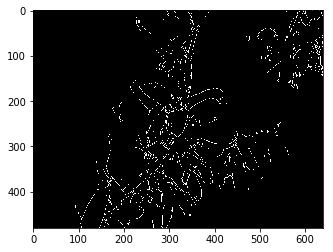

In [18]:
plt.imshow(dst,'gray')